# Tesnorflow Scratchpad

## Regression
Trying to reproduce sine


In [9]:
# Tensorflow Linear regression 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class Regression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (Regression)
        self.ypred = ypred  = tf.add(tf.mul(X, W), b)
        #defining the cost of 
        self.cost = tf.reduce_sum(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(100):
                final_y = []
                for (x, y) in zip(trX, trY):
                    self.sess.run(op, feed_dict={self.X: [[x]], self.Y: [[y]]})
                    c = self.sess.run(self.cost, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: [[x]], self.Y:[[y]]})
                    costs.append(np.max(c))
                    final_y.append(yf)
                avg_cost.append(np.mean(costs))
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(2,figsize=(20,10))
            axarr[0].plot(avg_cost)
            axarr[0].set_title('Cost and Prediction Plot')
            axarr[0].set_xlabel("iteration")
            axarr[1].scatter(trX, final_y)
            axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)    

In [68]:
trX = np.linspace(-2, 2, 200)
#trY = 2 * trX + np.random.randn(*trX.shape) * 0.33
# Adding some noise
trY = np.sin(trX)+ np.random.randn(*trX.shape) * 0.66

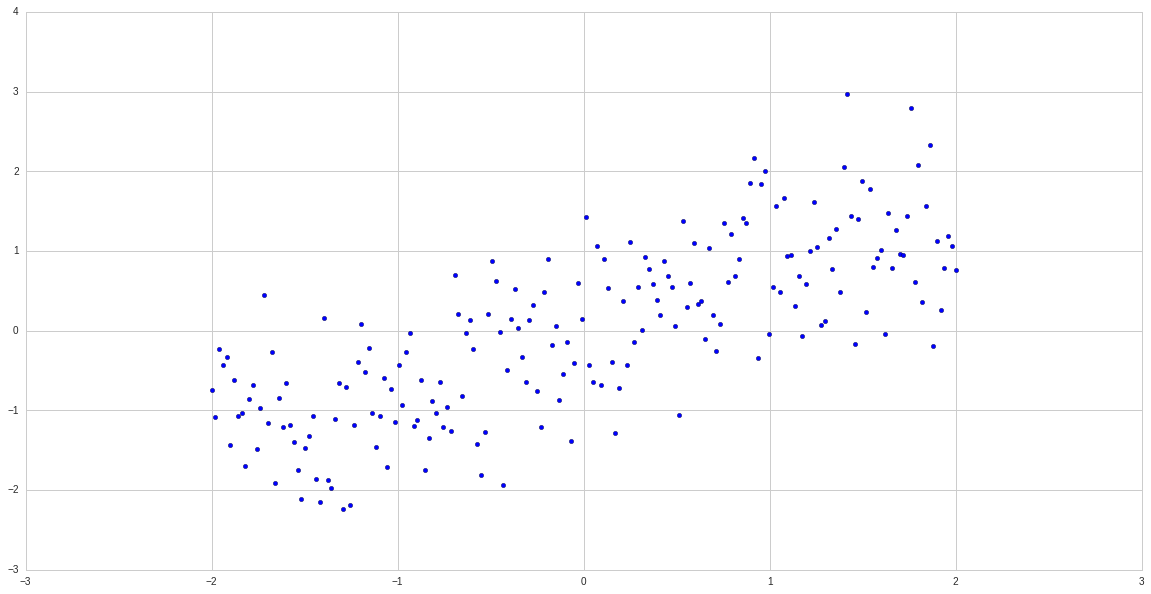

In [11]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.scatter(trX,trY)

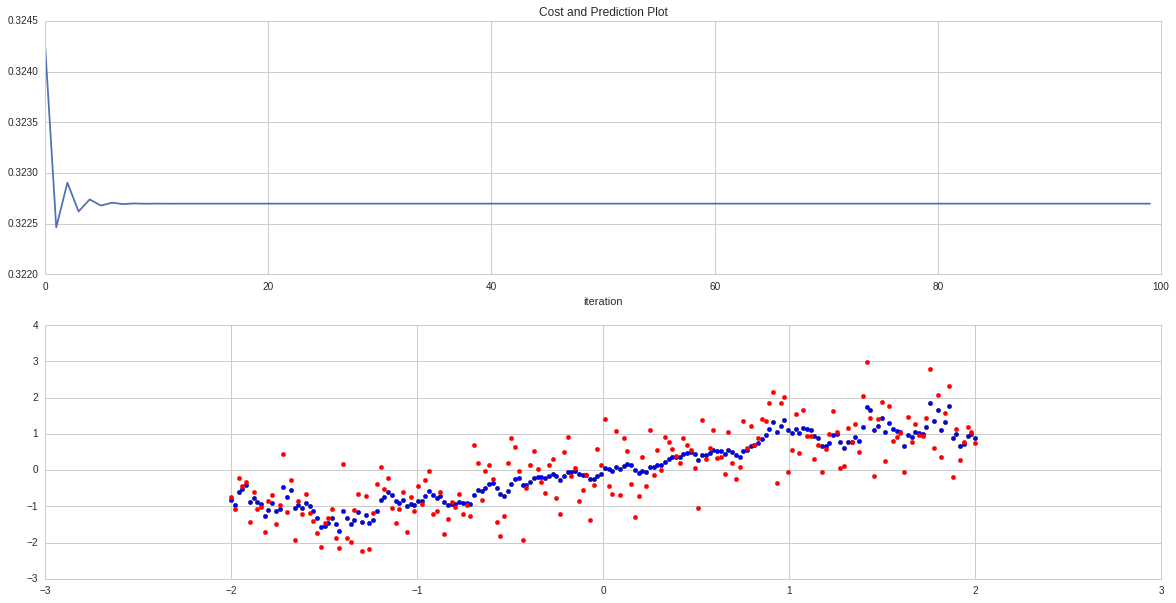

In [13]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
reg = Regression(1,1)

reg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY)

## Logistic Regression
Using MNIST dataset

In [65]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class LogisticRegression(object):
    def __init__(self,n_input,n_output):
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input]) # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output])

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        #defining the cost of 
        self.cost = tf.reduce_mean(tf.pow(ypred-Y, 2))
    
    
    
    def train(self,optimizer,learning_rate,x,y,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).minimize(self.cost)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
            #axarr[1].scatter(trX, final_y)
            #axarr[1].scatter(trX,trY,color="red")

            #print final_y
            #plt.plot(avg_cost)   

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
trX, trY, teX, teY = mnist.train.images[:5000], mnist.train.labels[:5000], mnist.test.images, mnist.test.labels

0  iteration : Mean cost 0.0895251
100  iteration : Mean cost 0.0507796
200  iteration : Mean cost 0.0361848
300  iteration : Mean cost 0.0293383
400  iteration : Mean cost 0.0256177
500  iteration : Mean cost 0.0233001
600  iteration : Mean cost 0.0217004
700  iteration : Mean cost 0.0205146
800  iteration : Mean cost 0.0195887
900  iteration : Mean cost 0.0188375
1000  iteration : Mean cost 0.0182102
1100  iteration : Mean cost 0.0176745
1200  iteration : Mean cost 0.017209
1300  iteration : Mean cost 0.0167987
1400  iteration : Mean cost 0.0164327
1500  iteration : Mean cost 0.0161031
1600  iteration : Mean cost 0.0158037
1700  iteration : Mean cost 0.0155298
1800  iteration : Mean cost 0.0152775
1900  iteration : Mean cost 0.015044
2000  iteration : Mean cost 0.0148266
2100  iteration : Mean cost 0.0146236
2200  iteration : Mean cost 0.0144331
2300  iteration : Mean cost 0.0142538
2400  iteration : Mean cost 0.0140844
2500  iteration : Mean cost 0.0139241
2600  iteration : Mean cos

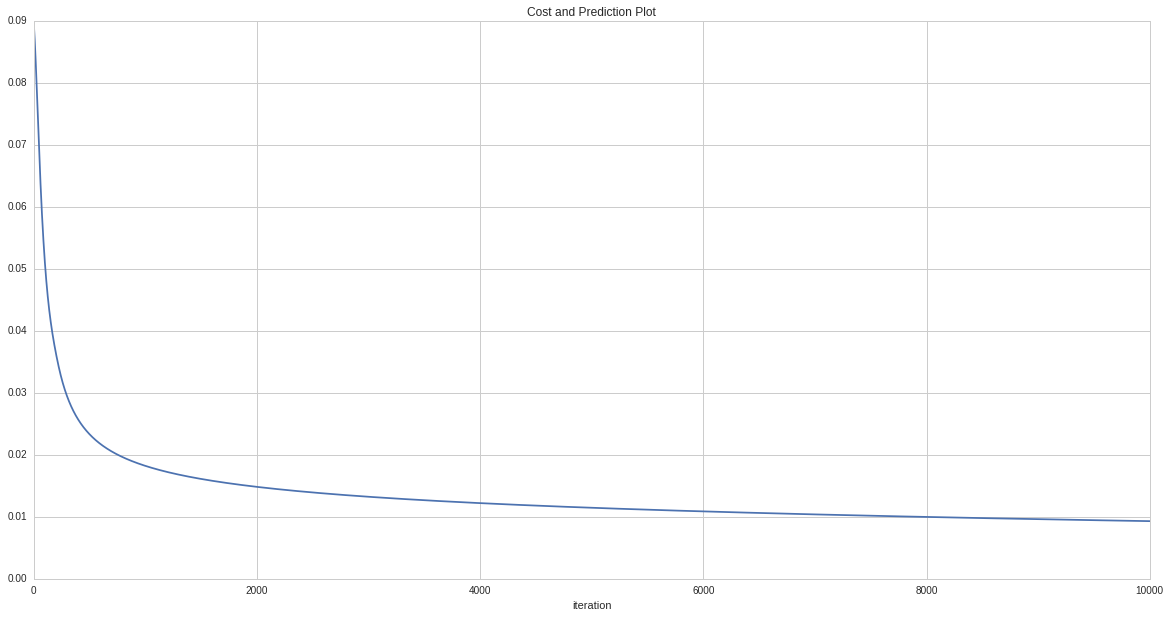

In [67]:
ops.reset_default_graph()
lreg = LogisticRegression(784,10)
lreg.train(tf.train.GradientDescentOptimizer,0.05,trX,trY,10000,400)

Simple example of mean by axis

In [60]:
a = [[1,2,3],[1,2,3]]
b = [[2,3,4],[2,3,4]]
ap = tf.placeholder("float32", [2, 3])
bp = tf.placeholder("float32", [2, 3])
c = tf.reduce_mean(tf.pow(ap - bp,2),1)
with tf.Session() as sess:
    print sess.run(c, feed_dict={ap: a,bp:b})

[ 1.  1.]


## Reinforce Algorithm

This uses the softmax for actions works with gym environment. Currently, for discrete action space

In [82]:
# Tensorflow Linear regression 
import tensorflow as tf
import numpy as np
import sys

class ReinforceDiscreteAgent(object):
    def __init__(self,env):
        n_input = env.observation_space.shape[0]
        n_output = env.action_space.n
        self.sess = tf.Session()
        
        self.X =X = tf.placeholder("float32", [None, n_input],name="Input") # create symbolic variables
        self.Y = Y = tf.placeholder("float32", [None, n_output], name="Action")
        self.r = r = tf.placeholder("float32",name="Reward")

        # Variables
        shape = [n_input,n_output]
        shape_bias = [1,n_output]
        self.W = W = tf.Variable(tf.random_normal(shape, stddev=0.01),name="weight")
        self.b = b = tf.Variable(tf.random_normal(shape_bias, stddev=0.01),name="b")
        
        #small value 
        epsilon =1e-8 
        # prediction (with softmax)
        self.ypred = ypred  = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
        self.tvars = tf.trainable_variables()
        #defining the gradient 
        self.gradient = -tf.reduce_mean(tf.mul(tf.log(ypred+epsilon),Y)*r)
    
    
    
    def learn(self,optimizer,learning_rate,x,y,actions,reward,n_iter,n_batchsize):
        #tf.initialize_all_variables()
        with self.sess:
            tf.initialize_all_variables().run()
            op = optimizer(learning_rate).apply_gradient(self.gradient,self.tvars)
            costs = []
            avg_cost = []
            for i in range(n_iter):
                final_y = []
                j = 0
                for (start, end) in zip(range(0,len(trX),n_batchsize), range(n_batchsize,len(trX),n_batchsize)):
                    j = j+1
                    self.sess.run(op, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    c = self.sess.run(self.cost, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    yf = self.sess.run(self.ypred, feed_dict={self.X: trX[start:end], self.Y: trY[start:end]})
                    costs.append(np.mean(c))
                    final_y.append(yf)
                    
                avg_cost.append(np.mean(costs))
                if(i %100 == 0):
                    print i," iteration : Mean cost",np.mean(costs)
                costs = []
            plt.figure(figsize=(20,10)) 
            f, axarr = plt.subplots(1,figsize=(20,10))
            axarr.plot(avg_cost)
            axarr.set_title('Cost and Prediction Plot')
            axarr.set_xlabel("iteration")
    def collect_trajectories(self,env,horizon,n_trajectories = 100):
         # starting state
        gamma = 0.99
        
        T = horizon
        trajectories = []
        
        for episodes in range(n_trajectories):
            env_history = []
            tau = []
            done = 0
            t = 0
            obs = env.reset()
            while done == 0 and t < T-1:
                action = env.action_space.sample() # your agent here (this takes random actions)
                observation, reward, done, info = env.step(action)
                onehot_action = np.zeros(env.action_space.n)
                onehot_action[action] = 1
                env_history.append((observation,onehot_action,reward))
                t = t + 1
                if done:
                    print("Episode finished after {} timesteps".format(t+1))
                    break

            for idx in range(len(env_history)):
                tau.append(( env_history[idx][0],env_history[idx][1], np.sum(np.multiply([i[2] for i in env_history[idx:]], 
                                         [gamma**i for i in np.arange(len(env_history[idx:])) ]))
                           ))
            trajectories.append(tau)
        return trajectories
        
    
    
    def act(self,obs):
        with self.sess as sess:
            #
            aa = 10
            
            

In [80]:
opt = tf.train.GradientDescentOptimizer(0.01)

In [74]:
import gym
from tensorflow.python.framework import ops
ops.reset_default_graph()
env = gym.make('CartPole-v0')
rf = ReinforceDiscreteAgent(env)

[2016-08-23 07:08:06,683] Making new env: CartPole-v0


In [75]:
for e in tf.trainable_variables():
    print e.name

weight:0
b:0


In [76]:
t = rf.collect_trajectories(env,100)

Episode finished after 15 timesteps
Episode finished after 19 timesteps
Episode finished after 30 timesteps
Episode finished after 11 timesteps
Episode finished after 29 timesteps
Episode finished after 17 timesteps
Episode finished after 24 timesteps
Episode finished after 14 timesteps
Episode finished after 55 timesteps
Episode finished after 19 timesteps
Episode finished after 20 timesteps
Episode finished after 17 timesteps
Episode finished after 24 timesteps
Episode finished after 13 timesteps
Episode finished after 29 timesteps
Episode finished after 50 timesteps
Episode finished after 16 timesteps
Episode finished after 17 timesteps
Episode finished after 15 timesteps
Episode finished after 17 timesteps
Episode finished after 18 timesteps
Episode finished after 24 timesteps
Episode finished after 17 timesteps
Episode finished after 15 timesteps
Episode finished after 21 timesteps
Episode finished after 26 timesteps
Episode finished after 11 timesteps
Episode finished after 34 ti

In [11]:
import numpy as np
gamma = 0.99
abc =  np.multiply([gamma**i for i in np.arange(10)], [gamma**i for i in np.arange(10)] )


In [14]:
 for i in reversed(abc):
        print i

0.83451376145
0.851457771095
0.868745812769
0.886384871716
0.904382075009
0.922744694428
0.941480149401
0.96059601
0.9801
1.0


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [77]:
for t in 

[[(array([-0.0301423 , -0.24523905,  0.03665692,  0.28907117]),
   array([ 1.,  0.]),
   13.12541872310217),
  (array([-0.03504708, -0.44086403,  0.04243835,  0.59308623]),
   array([ 1.,  0.]),
   12.247897700103202),
  (array([-0.04386436, -0.63655355,  0.05430007,  0.89882935]),
   array([ 1.,  0.]),
   11.361512828387072),
  (array([-0.05659543, -0.44220792,  0.07227666,  0.62369695]),
   array([ 0.,  1.]),
   10.466174574128356),
  (array([-0.06543959, -0.6382606 ,  0.0847506 ,  0.93823903]),
   array([ 1.,  0.]),
   9.5617924991195515),
  (array([-0.0782048 , -0.44437724,  0.10351538,  0.67334467]),
   array([ 0.,  1.]),
   8.6482752516359103),
  (array([-0.08709235, -0.64077403,  0.11698227,  0.9967421 ]),
   array([ 1.,  0.]),
   7.72553055720799),
  (array([-0.09990783, -0.44739414,  0.13691711,  0.74296918]),
   array([ 0.,  1.]),
   6.793465209301),
  (array([-0.10885571, -0.64411357,  0.1517765 ,  1.07541481]),
   array([ 1.,  0.]),
   5.8519850598999996),
  (array([-0.1217

In [81]:
?opt.apply_gradients